###5.5 - Exploração com Gráficos e Mapas


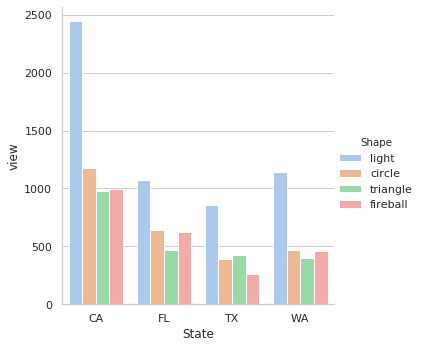

In [0]:
#Lista de itens obrigatórios para essa exploração

#Agora você deve fazer um gráfico utilizando informações provenientes de uma consulta. Percebemos quais são os 
#quatro estados que possuem maior frequência de relatos, assim como os tipos de OVNIs mais populares. Portanto, 
#você deve fazer dois gráficos que envolvam essas informações.

#Enriqueceremos os dados ainda mais, dessa vez na forma de mapas. Para construirmos mapas precisamos de 
#latitude e longitude (usar a biblioteca zipcodes (Links para um site externo.)). 
#Para criar os mapas você pode utilizar o gmaps (Links para um site externo.)
#ou o matplotlib > basemap (Links para um site externo.).

import pandas as pd
#!pip install -U pandasql
import pandasql
import seaborn as sb

df = pd.read_csv("script_coleta.csv")

df_estados=pd.DataFrame()
df_estados['sigla'] = ['AL','AK','AR','AZ','CA','KS','NC','SC','CO','CT','ND','SD','DE','FL','GA','HI','ID','RI','IL','IN','IA','KY','LA','ME',
               'MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NY','NM','OK','OH','OR', 'PA','TN','TX','UT','VT','VA','WV','WA','WI','WY']
estados = """ SELECT * FROM df, df_estados WHERE State = sigla; """
sql_eua = pandasql.sqldf(estados)


#Quais são os quatro estados que tem mais relatos
states = """ SELECT *, count(*) as quantidade FROM sql_eua WHERE State IN ('CA','FL','WA','TX') GROUP BY State ORDER BY quantidade DESC;"""
sql = pandasql.sqldf(states) 

#Quais são os tipos de Ovnis mais populares
ovins = """ SELECT Shape, count(*) as quant FROM sql_eua WHERE Shape IN ('Light', 'Circle', 'Triangle', 'Fireball') GROUP BY Shape ORDER BY quant DESC; """
sqlS = pandasql.sqldf(ovins)

quan = """ SELECT State, LOWER(Shape) as Shape, count(*) as view FROM sql_eua WHERE State IN('CA','FL','WA','TX') 
AND LOWER(Shape) IN ('light','circle','fireball','triangle') GROUP BY State,LOWER(Shape) ORDER BY State;"""
sqls = pandasql.sqldf(quan)

quant = """ SELECT LOWER(Shape) ,count(Shape) FROM sql_eua WHERE LOWER(Shape)!='unknown' AND LOWER(Shape)!= 'none' GROUP BY LOWER(Shape) 
ORDER BY count(Shape) desc;"""
sqlls = pandasql.sqldf(quant)

#Gráfico de barras agrupadas,
sb.set(style="whitegrid")
sb.catplot(x="State", y="view", hue="Shape", data= sqls, kind="bar", palette="pastel", hue_order=['light', 'circle', 'triangle', 'fireball'])


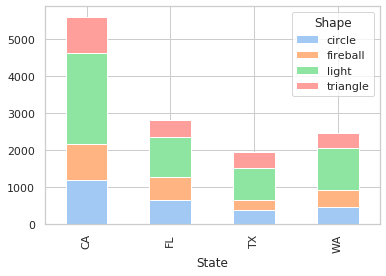

In [0]:
#Gráfico de barras empilhadas
sqls.pivot("State","Shape","view").plot(kind="bar", stacked=True, color=sb.color_palette("pastel"))
